In [2]:
from requests import get
from bs4 import BeautifulSoup
from IPython.core.display import clear_output
from time import sleep, time
from random import randint
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud  #pip install wordcloud  <--- Do this in anaconda before you run jupyter notebook
import numpy as np
from statistics import mean
import pandas as pd
import seaborn as sns

In [3]:
final_df = pd.read_csv('polishedfinal_dataframe2.csv')
final_df = final_df.drop(final_df.columns.values[0], axis=1)
final_df['Yelp Bias'] = final_df['Average Ratings'] - final_df['Review_Average']
final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5,2.0,4.0,3.0,5.0,...,5.0,4.0,3.0,5.0,1.0,2.0,4.0,3.90,0.60,False
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,3.0,3.0,4.0,4.0,3.35,0.65,False
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5,4.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,3.0,5.0,3.0,4.40,0.10,False
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5,4.0,5.0,5.0,5.0,...,5.0,5.0,3.0,4.0,4.0,4.0,4.0,4.35,-0.35,False
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5,4.0,4.0,2.0,3.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.10,-0.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.35,5,5.0,3.0,1.0,5.0,...,2.0,3.0,2.0,5.0,5.0,3.0,1.0,3.35,0.65,True
797,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.00,5,3.0,1.0,3.0,3.0,...,2.0,4.0,4.0,1.0,4.0,2.0,4.0,3.00,0.50,True
798,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.80,5,5.0,1.0,5.0,2.0,...,1.0,5.0,5.0,5.0,3.0,4.0,2.0,3.80,0.20,True
799,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.55,5,5.0,4.0,5.0,1.0,...,1.0,1.0,5.0,1.0,5.0,5.0,2.0,3.55,-0.05,True


In [4]:
reviews = final_df.iloc[:, 5:25]
reviews

,Review_1,Review_2,Review_3,Review_4,Review_5,Review_6,Review_7,Review_8,Review_9,Review_10,Review_11,Review_12,Review_13,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20
0,5,2.0,4.0,3.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,3.0,5.0,1.0,2.0,4.0
1,4,3.0,3.0,2.0,3.0,4.0,2.0,5.0,5.0,4.0,4.0,1.0,2.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0
2,5,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,3.0
3,5,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0
4,5,4.0,4.0,2.0,3.0,5.0,4.0,2.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,5,5.0,3.0,1.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,2.0,5.0,5.0,3.0,1.0
797,5,3.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,4.0,4.0,1.0,4.0,2.0,4.0
798,5,5.0,1.0,5.0,2.0,5.0,5.0,5.0,1.0,4.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,3.0,4.0,2.0
799,5,5.0,4.0,5.0,1.0,4.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0,1.0,5.0,5.0,2.0


In [5]:
reviews_std  = (reviews.std(axis = 1 ))
reviews_min = (reviews.min(axis = 1))
reviews_max = (reviews.max(axis = 1))
reviews_25_quantile = (reviews.quantile(q = .25 , axis =1))
reviews_50_quantile = (reviews.quantile(q = .5 , axis = 1))
reviews_75_quantile = (reviews.quantile(q = .75, axis = 1))

In [6]:
reviews_std.tolist()
reviews_min.tolist()
reviews_max.tolist()
reviews_25_quantile.tolist()
reviews_50_quantile.tolist()
reviews_75_quantile.tolist()

[5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 5.0,
 4.0,
 5.0,
 5.0,
 4.25,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 4.25,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 4.0,
 4.25,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.25,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,


In [7]:
final_df["Standard_Deviation"] = reviews_std
final_df["Min_Value"] = reviews_min
final_df["Max_Value"] = reviews_max
final_df["25 Quartile"] = reviews_25_quantile
final_df["50 Quartile"] = reviews_50_quantile
final_df["75 Quartile"] = reviews_75_quantile

In [8]:
final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_20,Review_Average,Yelp Bias,Veg,Standard_Deviation,Min_Value,Max_Value,25 Quartile,50 Quartile,75 Quartile
0,https://www.yelp.com/biz/tselogs-san-francisco...,4.5,601,1,3.90,5,2.0,4.0,3.0,5.0,...,4.0,3.90,0.60,False,1.165287,1.0,5.0,3.75,4.0,5.0
1,https://www.yelp.com/biz/nicks-crispy-tacos-sa...,4.0,3312,1,3.35,4,3.0,3.0,2.0,3.0,...,4.0,3.35,0.65,False,1.089423,1.0,5.0,3.00,3.0,4.0
2,https://www.yelp.com/biz/golden-boy-pizza-san-...,4.5,3448,1,4.40,5,4.0,5.0,4.0,5.0,...,3.0,4.40,0.10,False,0.680557,3.0,5.0,4.00,4.5,5.0
3,https://www.yelp.com/biz/house-of-pancakes-san...,4.0,951,1,4.35,5,4.0,5.0,5.0,5.0,...,4.0,4.35,-0.35,False,0.670820,3.0,5.0,4.00,4.0,5.0
4,https://www.yelp.com/biz/the-bird-san-francisc...,4.0,1661,1,4.10,5,4.0,4.0,2.0,3.0,...,5.0,4.10,-0.10,False,0.967906,2.0,5.0,4.00,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,https://www.yelp.com/biz/phos-spicier-thai-cui...,4.0,72,2,3.35,5,5.0,3.0,1.0,5.0,...,1.0,3.35,0.65,True,1.725200,1.0,5.0,1.75,3.5,5.0
797,https://www.yelp.com/biz/udupi-palace-restaura...,3.5,362,2,3.00,5,3.0,1.0,3.0,3.0,...,4.0,3.00,0.50,True,1.486784,1.0,5.0,1.75,3.0,4.0
798,https://www.yelp.com/biz/idof-fresh-mediterran...,4.0,44,2,3.80,5,5.0,1.0,5.0,2.0,...,2.0,3.80,0.20,True,1.542384,1.0,5.0,2.75,4.5,5.0
799,https://www.yelp.com/biz/arya-bhavan-chicago?o...,3.5,229,2,3.55,5,5.0,4.0,5.0,1.0,...,2.0,3.55,-0.05,True,1.848897,1.0,5.0,1.00,5.0,5.0


Text(0.5, 0, 'Price of Restaurant')

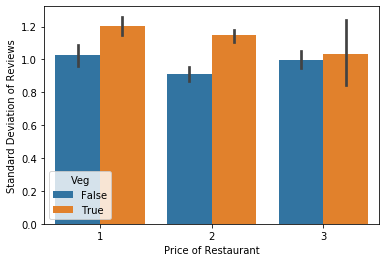

In [16]:
a=sns.barplot(x='Price Per Person', y='Standard_Deviation', hue='Veg', data=final_df)
#a.set_xtickslabels(['$','$$','$$$'])
a.set(ylabel="Standard Deviation of Reviews")
#a.set_xlim(3.25,8.5)
a.set_xlabel('Price of Restaurant')
#a.set_ylabel('Count')
#a.set_title()